In [50]:
# Common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn import svm

In [51]:
#Loading the data
raw_data = pd.read_csv("url.csv") 
raw_data

,URL,Target,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,https://locking-app-adverds.000webhostapp.com/...,yes,NaN,NaN,NaN,NaN
1,http://www.myhealthcarepharmacy.ca/wp-includes...,yes,NaN,NaN,NaN,NaN
2,http://code.google.com/p/pylevenshtein/,no,NaN,NaN,NaN,NaN
3,http://linkedin.com/,no,NaN,NaN,NaN,NaN
4,http://imageshack.com/f/219/cadir2yr3.jpg,no,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1776,https://docs.google.com/document/u/1/,no,NaN,NaN,NaN,NaN
1777,http://www.charlestodd.com/wp-includes/pomo/ad...,yes,NaN,NaN,NaN,NaN
1778,http://tslimpact.com/medsynaptic/wp-content/th...,yes,NaN,NaN,NaN,NaN
1779,http://daoudilorin11.mystagingwebsite.com/wp-c...,yes,NaN,NaN,NaN,NaN


In [52]:
#Dropping the duplicated data
raw_data=raw_data.drop_duplicates()
dups=raw_data.duplicated()
dups.any()
raw_data.reset_index()

,index,URL,Target,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,0,https://locking-app-adverds.000webhostapp.com/...,yes,NaN,NaN,NaN,NaN
1,1,http://www.myhealthcarepharmacy.ca/wp-includes...,yes,NaN,NaN,NaN,NaN
2,2,http://code.google.com/p/pylevenshtein/,no,NaN,NaN,NaN,NaN
3,3,http://linkedin.com/,no,NaN,NaN,NaN,NaN
4,4,http://imageshack.com/f/219/cadir2yr3.jpg,no,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1733,1776,https://docs.google.com/document/u/1/,no,NaN,NaN,NaN,NaN
1734,1777,http://www.charlestodd.com/wp-includes/pomo/ad...,yes,NaN,NaN,NaN,NaN
1735,1778,http://tslimpact.com/medsynaptic/wp-content/th...,yes,NaN,NaN,NaN,NaN
1736,1779,http://daoudilorin11.mystagingwebsite.com/wp-c...,yes,NaN,NaN,NaN,NaN


In [53]:
#Splitting dataset for training and testing
train,test=train_test_split(raw_data,train_size=0.8,random_state=40)
train=train.reset_index(drop=True)
test=test.reset_index(drop=True)

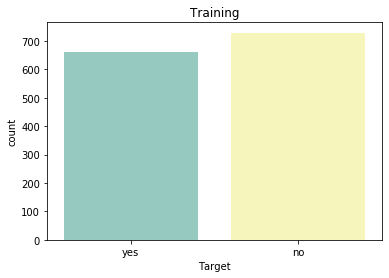

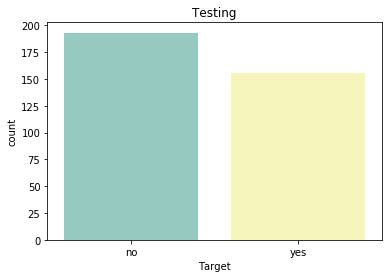

In [54]:
sns.countplot(x='Target',data=train, palette = 'Set3')
plt.title("Training")
plt.show()

sns.countplot(x='Target',data=test, palette = 'Set3')
plt.title("Testing")
plt.show()

In [55]:
train.reset_index()

,index,URL,Target,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,0,http://alliance-programs.com/ase/ok/particulie...,yes,NaN,NaN,NaN,NaN
1,1,http://inforcept.com/,no,NaN,NaN,NaN,NaN
2,2,http://www.gartner.com/document/3096017?ref=so...,no,NaN,NaN,NaN,NaN
3,3,http://www.stephanehamard.com/components/com_j...,yes,NaN,NaN,NaN,NaN
4,4,https://news.ycombinator.com/sso?n=nwzuyx64hw0...,no,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1385,1385,https://infoway.com.tr/infoway/,no,NaN,NaN,NaN,NaN
1386,1386,http://lcckidspace.com/wp-includes/js/documento/,yes,NaN,NaN,NaN,NaN
1387,1387,http://ebay.com/,no,NaN,NaN,NaN,NaN
1388,1388,http://adrianofreschi.com/wp-admin/network/upd...,yes,NaN,NaN,NaN,NaN


In [56]:
train['URL'].str.split("://").head() #Here we divided the protocol from the entire URL. but need it to be divided it 
                                                 #seperate column

0    [http, alliance-programs.com/ase/ok/particulie...
1                               [http, inforcept.com/]
2    [http, www.gartner.com/document/3096017?ref=so...
3    [http, www.stephanehamard.com/components/com_j...
4    [https, news.ycombinator.com/sso?n=nwzuyx64hw0...
Name: URL, dtype: object

In [57]:
seperation_of_protocol = train['URL'].str.split("://",expand = True) #expand argument in the split method will give you a new column

In [58]:
seperation_of_protocol.head()

,0,1,2,3,4,5,6
0,http,alliance-programs.com/ase/ok/particuliers/upda...,None,None,None,None,None
1,http,inforcept.com/,None,None,None,None,None
2,http,www.gartner.com/document/3096017?ref=solrresea...,None,None,None,None,None
3,http,www.stephanehamard.com/components/com_joomlast...,None,None,None,None,None
4,https,news.ycombinator.com/sso?n=nwzuyx64hw0lgo71uf5...,None,None,None,None,None


In [59]:
type(seperation_of_protocol)

pandas.core.frame.DataFrame

In [60]:
seperation_domain_name = seperation_of_protocol[1].str.split("/",1,expand = True) #split(seperator,no of splits according to seperator(delimiter),expand)

In [61]:
type(seperation_domain_name)

pandas.core.frame.DataFrame

In [62]:
seperation_domain_name.columns=["domain_name","address"] #renaming columns of data frame

In [63]:
seperation_domain_name.head()

,domain_name,address
0,alliance-programs.com,ase/ok/particuliers/update/account-id0146751/u...
1,inforcept.com,
2,www.gartner.com,document/3096017?ref=solrresearch&refval=17426...
3,www.stephanehamard.com,components/com_joomlastats/fr/686eef34b098cb95...
4,news.ycombinator.com,sso?n=nwzuyx64hw0lgo71uf5z9w&name=ycapply


In [64]:
#Concatenation of data frames
splitted_data = pd.concat([seperation_of_protocol[0],seperation_domain_name],axis=1)


In [65]:
splitted_data.columns = ['protocol','domain_name','address']

In [66]:
splitted_data.head()

,protocol,domain_name,address
0,http,alliance-programs.com,ase/ok/particuliers/update/account-id0146751/u...
1,http,inforcept.com,
2,http,www.gartner.com,document/3096017?ref=solrresearch&refval=17426...
3,http,www.stephanehamard.com,components/com_joomlastats/fr/686eef34b098cb95...
4,https,news.ycombinator.com,sso?n=nwzuyx64hw0lgo71uf5z9w&name=ycapply


In [67]:
splitted_data['is_phished'] = pd.Series(train['Target'], index=splitted_data.index)

In [68]:
splitted_data

,protocol,domain_name,address,is_phished
0,http,alliance-programs.com,ase/ok/particuliers/update/account-id0146751/u...,yes
1,http,inforcept.com,,no
2,http,www.gartner.com,document/3096017?ref=solrresearch&refval=17426...,no
3,http,www.stephanehamard.com,components/com_joomlastats/fr/686eef34b098cb95...,yes
4,https,news.ycombinator.com,sso?n=nwzuyx64hw0lgo71uf5z9w&name=ycapply,no
...,...,...,...,...
1385,https,infoway.com.tr,infoway/,no
1386,http,lcckidspace.com,wp-includes/js/documento/,yes
1387,http,ebay.com,,no
1388,http,adrianofreschi.com,wp-admin/network/update/cn/ug/index.php?login=...,yes


In [69]:
type(splitted_data)

pandas.core.frame.DataFrame

In [70]:
#1--phishing
#2--suspicious
def long_url(l):
    l= str(l)
    """This function is defined in order to differntiate website based on the length of the URL"""
    if len(l) < 54:
        return 0
    elif len(l) >= 54 and len(l) <= 75:
        return 2
    return 1

In [71]:
#Applying the above defined function in order to divide the websites into 3 categories
splitted_data['long_url'] = train['URL'].apply(long_url) 


In [72]:
#Will show the results only the websites which are legitimate according to above condition as 0 is legitimate website
splitted_data[splitted_data.long_url == 0] 

,protocol,domain_name,address,is_phished,long_url
1,http,inforcept.com,,no,0
5,http,cofounderlabs.com,,no,0
7,http,fc0.co,,no,0
10,https,fleet.postmates.com,legal/agreement,no,0
11,http,whois.domaintools.com,,no,0
...,...,...,...,...,...
1383,http,order.hbonow.com,?camp=nowm46,no,0
1384,http,btholt.github.io,complete-intro-to-react,no,0
1385,https,infoway.com.tr,infoway/,no,0
1386,http,lcckidspace.com,wp-includes/js/documento/,yes,0


In [73]:
#1--phishing as @causes not to see the front portion of url to it
def have_at_symbol(l):
    """This function is used to check whether the URL contains @ symbol or not"""
    if "@" in str(l):
        return 1
    return 0
    

In [74]:
splitted_data['having_@_symbol'] = train['URL'].apply(have_at_symbol)

In [75]:
splitted_data

,protocol,domain_name,address,is_phished,long_url,having_@_symbol
0,http,alliance-programs.com,ase/ok/particuliers/update/account-id0146751/u...,yes,1,0
1,http,inforcept.com,,no,0,0
2,http,www.gartner.com,document/3096017?ref=solrresearch&refval=17426...,no,1,0
3,http,www.stephanehamard.com,components/com_joomlastats/fr/686eef34b098cb95...,yes,1,0
4,https,news.ycombinator.com,sso?n=nwzuyx64hw0lgo71uf5z9w&name=ycapply,no,2,0
...,...,...,...,...,...,...
1385,https,infoway.com.tr,infoway/,no,0,0
1386,http,lcckidspace.com,wp-includes/js/documento/,yes,0,0
1387,http,ebay.com,,no,0,0
1388,http,adrianofreschi.com,wp-admin/network/update/cn/ug/index.php?login=...,yes,1,1


In [76]:
# // is used for redirecting so it is legitimate and include as phishing
def redirection(l):
    """If the url has symbol(//) after protocol then such URL is to be classified as phishing """
    if "//" in str(l):
        return 1
    return 0

In [77]:
splitted_data['redirection_//_symbol'] = seperation_of_protocol[1].apply(redirection)

In [78]:
splitted_data.head()

,protocol,domain_name,address,is_phished,long_url,having_@_symbol,redirection_//_symbol
0,http,alliance-programs.com,ase/ok/particuliers/update/account-id0146751/u...,yes,1,0,0
1,http,inforcept.com,,no,0,0,0
2,http,www.gartner.com,document/3096017?ref=solrresearch&refval=17426...,no,1,0,0
3,http,www.stephanehamard.com,components/com_joomlastats/fr/686eef34b098cb95...,yes,1,0,0
4,https,news.ycombinator.com,sso?n=nwzuyx64hw0lgo71uf5z9w&name=ycapply,no,2,0,0


In [79]:
def prefix_suffix_seperation(l):
    if '-' in str(l):
        return 1
    return 0

In [80]:
splitted_data['prefix_suffix_seperation'] = seperation_domain_name['domain_name'].apply(prefix_suffix_seperation)

In [81]:
splitted_data.head()

,protocol,domain_name,address,is_phished,long_url,having_@_symbol,redirection_//_symbol,prefix_suffix_seperation
0,http,alliance-programs.com,ase/ok/particuliers/update/account-id0146751/u...,yes,1,0,0,1
1,http,inforcept.com,,no,0,0,0,0
2,http,www.gartner.com,document/3096017?ref=solrresearch&refval=17426...,no,1,0,0,0
3,http,www.stephanehamard.com,components/com_joomlastats/fr/686eef34b098cb95...,yes,1,0,0,0
4,https,news.ycombinator.com,sso?n=nwzuyx64hw0lgo71uf5z9w&name=ycapply,no,2,0,0,0


In [82]:
def sub_domains(l):
    l= str(l)
    if l.count('.') < 3:
        return 0
    elif l.count('.') == 3:
        return 2
    return 1

In [83]:
splitted_data['sub_domains'] = splitted_data['domain_name'].apply(sub_domains)

In [84]:
splitted_data.to_csv('newdf.csv')

In [85]:
splitted_data.head()

,protocol,domain_name,address,is_phished,long_url,having_@_symbol,redirection_//_symbol,prefix_suffix_seperation,sub_domains
0,http,alliance-programs.com,ase/ok/particuliers/update/account-id0146751/u...,yes,1,0,0,1,0
1,http,inforcept.com,,no,0,0,0,0,0
2,http,www.gartner.com,document/3096017?ref=solrresearch&refval=17426...,no,1,0,0,0,0
3,http,www.stephanehamard.com,components/com_joomlastats/fr/686eef34b098cb95...,yes,1,0,0,0,0
4,https,news.ycombinator.com,sso?n=nwzuyx64hw0lgo71uf5z9w&name=ycapply,no,2,0,0,0,0


In [86]:
#------Random Forest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [88]:
#Features
x = splitted_data.columns[4:9]
x   

Index(['long_url', 'having_@_symbol', 'redirection_//_symbol',
       'prefix_suffix_seperation', 'sub_domains'],
      dtype='object')

In [89]:
#variable to be predicted; yes = 0 and no = 1
y = pd.factorize(splitted_data['is_phished'])[0]
y 

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [90]:
splitted_data[x].isnull().sum()
splitted_data[x]=splitted_data[x].dropna()
splitted_data[x].isnull().sum()

long_url                    0
having_@_symbol             0
redirection_//_symbol       0
prefix_suffix_seperation    0
sub_domains                 0
dtype: int64

In [91]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_estimators=100,n_jobs=2,random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(splitted_data[x], y)


svmc = svm.SVC(kernel='rbf')
svmc.fit(splitted_data[x], y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [92]:
tsplitted_data=splitted_data[x]

In [93]:
test['URL'].str.split("://").head() 
seperation_of_protocol = test['URL'].str.split("://",expand = True) 
seperation_domain_name = seperation_of_protocol[1].str.split("/",1,expand = True) 
seperation_domain_name.columns=["domain_name","address"]

splitted_data = pd.concat([seperation_of_protocol[0],seperation_domain_name],axis=1)
splitted_data.columns = ['protocol','domain_name','address']
splitted_data['is_phished'] = pd.Series(test['Target'], index=splitted_data.index)

splitted_data['long_url'] = test['URL'].apply(long_url) 
splitted_data[splitted_data.long_url == 0] 
splitted_data['having_@_symbol'] = test['URL'].apply(have_at_symbol)


splitted_data['redirection_//_symbol'] = seperation_of_protocol[1].apply(redirection)
splitted_data['prefix_suffix_seperation'] = seperation_domain_name['domain_name'].apply(prefix_suffix_seperation)
splitted_data['sub_domains'] = splitted_data['domain_name'].apply(sub_domains)

In [94]:
x = splitted_data.columns[4:9]
preds=clf.predict(splitted_data[x])
preds2=svmc.predict(splitted_data[x])
#testing the classifier on test data.

In [95]:
preds

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,

In [96]:
actual = pd.factorize(splitted_data['is_phished'])[0]

In [97]:
accuracy_score(actual.astype(str),preds.astype(str)) #accuracy of Random Forest classifier

0.4166666666666667

In [98]:
accuracy_score(actual.astype(str),preds2.astype(str)) #accuracy of SVM classifier

0.41379310344827586

In [99]:
#importance of features
list(zip(splitted_data[x], clf.feature_importances_))

[('long_url', 0.3842829323892643),
 ('having_@_symbol', 0.01919783460633761),
 ('redirection_//_symbol', 0.0),
 ('prefix_suffix_seperation', 0.5221138427184326),
 ('sub_domains', 0.07440539028596542)]